In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
country_dataframes = []
for country_file in os.listdir("country_covid"):
    country_dataframes.append(pd.read_csv(f'country_covid/{country_file}'))

covid_france = country_dataframes[0]
covid_germany = country_dataframes[1]
covid_uk =  country_dataframes[2]

In [3]:
def plot_covid(*dataframes):
    
    plt.rcParams["figure.figsize"] = (25,10)
    plt.rcParams['ytick.labelsize'] = 18
    plt.rcParams['xtick.labelsize'] = 18
    
    switch = input("type c for cases or d for deaths :")
    if switch == "c":
        var = "daily_case_count"
    elif switch == "d":
        var = "daily_death_count"
    else:
        print("error retype var please")
    limit = - float("inf")
    
    for df in dataframes:
        limit = max(limit, df[var].max())
    
    for i ,df in enumerate(dataframes):
        df["date"] = pd.to_datetime(df["date"])
        plt.plot(df["date"], df[var], label=f'{i}')
    
    if switch =="c":
        limit = limit +5000
    if switch =="d":
        limit = limit+limit/2
    
    plt.ylim(0, limit)
    plt.xlim(df["date"].min(), df["date"].max())
    plt.xlabel("Time", fontsize=20)
    plt.ylabel("Count", fontsize=20)
    plt.title(f"Evolution of {var} across time", fontsize=30)
    plt.legend(loc="upper left")
    plt.grid(True)
    
    plt.show()

# Plots

type c for cases or d for deaths :d


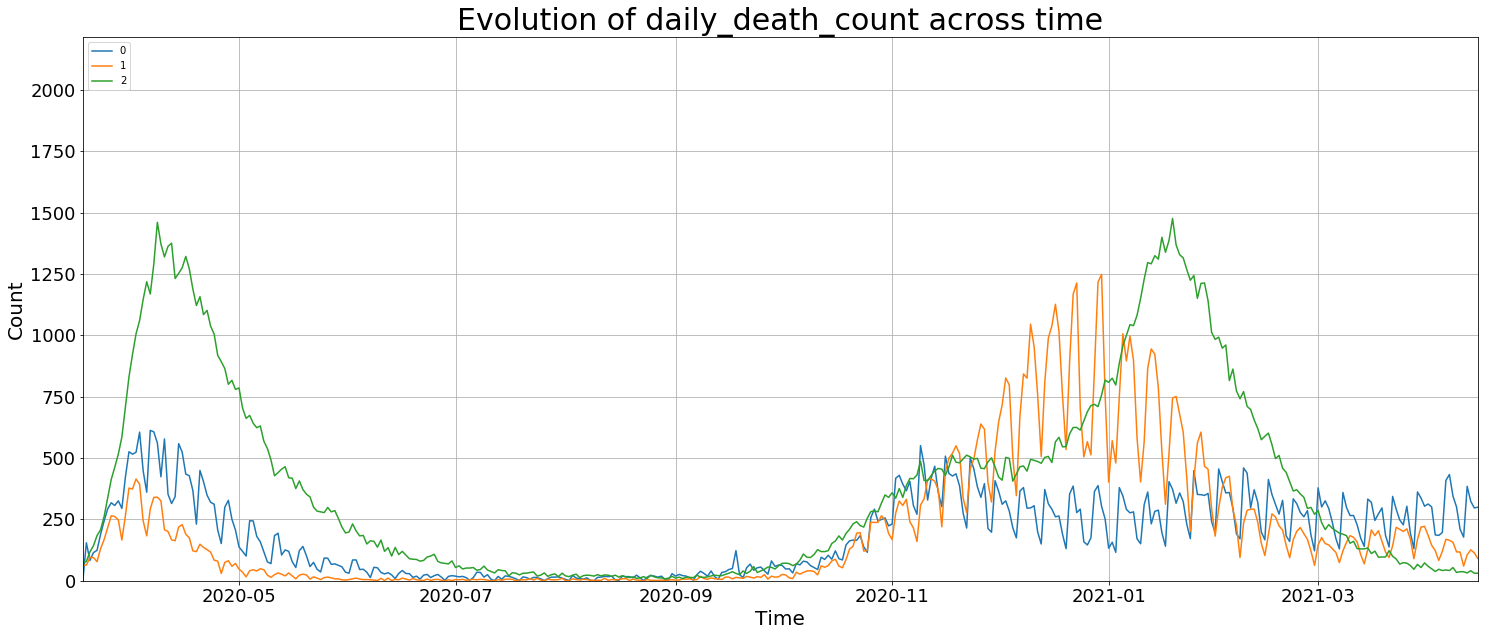

In [4]:
plot_covid(covid_france, covid_germany, covid_uk)
#blue then orange then green